c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with max_iter=50
Train Accuracy: 0.5292568382306276
Test Accuracy: 0.5220642677328595
------------------------------------------------------------
Logistic Regression with max_iter=100
Train Accuracy: 0.5293520340166276
Test Accuracy: 0.5221383088997482
------------------------------------------------------------
Logistic Regression with max_iter=200
Train Accuracy: 0.5293520340166276
Test Accuracy: 0.5221383088997482
------------------------------------------------------------
Logistic Regression with max_iter=300
Train Accuracy: 0.5293520340166276
Test Accuracy: 0.5221383088997482
------------------------------------------------------------
Logistic Regression with max_iter=400
Train Accuracy: 0.5293520340166276
Test Accuracy: 0.5221383088997482
------------------------------------------------------------
Logistic Regression with max_iter=500
Train Accuracy: 0.5293520340166276
Test Accuracy: 0.5221383088997482
------------------------------------------------------

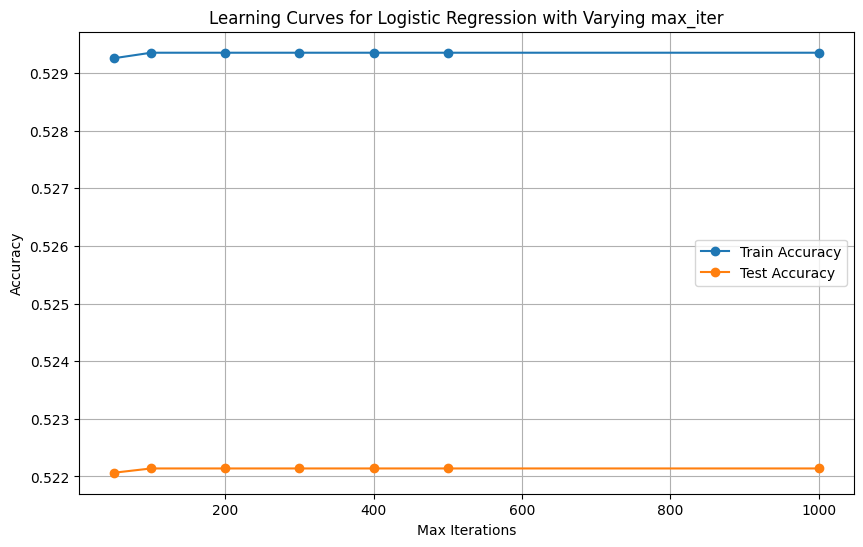

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/musicgenre.csv')

# Handle missing values
df = df.dropna(subset=['music_genre'])
df = df.replace("?", None).dropna()

# Encode categorical features
genre_encoder = LabelEncoder()
df['music_genre'] = genre_encoder.fit_transform(df['music_genre'])
df['key'] = LabelEncoder().fit_transform(df['key'])
df['mode'] = LabelEncoder().fit_transform(df['mode'])

# Get the class names for music_genre
genre_names = genre_encoder.inverse_transform(range(len(genre_encoder.classes_)))

# Scale the features
df["duration_ms"] = df["duration_ms"] / 1000

# Drop irrelevant columns
df.drop(['track_name', 'instance_id', 'obtained_date', 'artist_name'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop(columns=['music_genre'])
y = df['music_genre']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Define the max_iter values to test
max_iter_values = [50, 100, 200, 300, 400, 500, 1000]

# Initialize lists to store the results
train_accuracies = []
test_accuracies = []

# Test each max_iter value
for max_iter in max_iter_values:
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred := model.predict(X_test))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f"Logistic Regression with max_iter={max_iter}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("-" * 60)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_iter_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Logistic Regression with Varying max_iter')
plt.legend()
plt.grid(True)
plt.show()
